In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import pandas as pd

In [4]:
results = pd.read_csv('MOB_final_results.csv', index_col=0)
sample_info = pd.read_csv('MOB_sample_info.csv', index_col=0)

In [5]:
df = pd.read_csv('data/Rep11_MOB_0.csv', index_col=0)
df = df.T[df.sum(0) >= 3].T  # Filter practically unobserved genes
dfm = np.log10(df + 1)

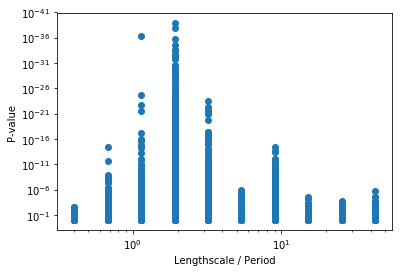

In [6]:
plt.loglog()
plt.scatter(results.l, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Lengthscale / Period')
plt.ylabel('P-value');

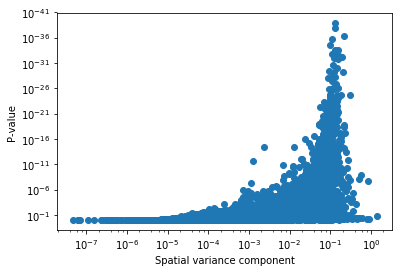

In [7]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.pval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('P-value');

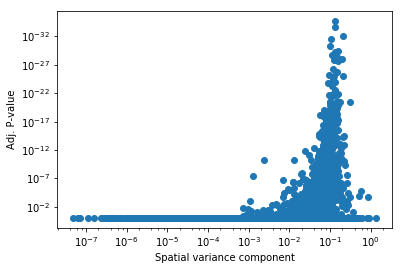

In [8]:
plt.loglog()
plt.scatter(results.max_s2_t_hat, results.qval);
plt.gca().invert_yaxis();
plt.xlabel('Spatial variance component')
plt.ylabel('Adj. P-value');

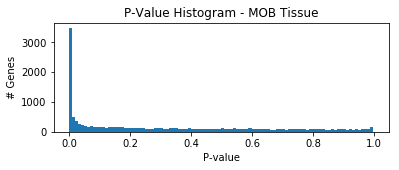

In [9]:
figsize(6, 2)
plt.hist(results.pval, bins=100);
plt.title('P-Value Histogram - MOB Tissue')
plt.ylabel('# Genes')
plt.xlabel('P-value');

plt.savefig('MOB-pvalue-hist.pdf')

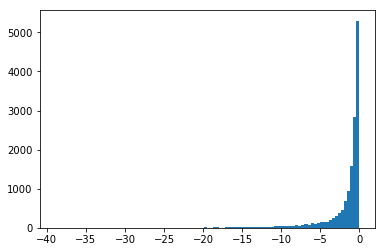

In [18]:
plt.hist(np.log10(results.pval), bins=100);

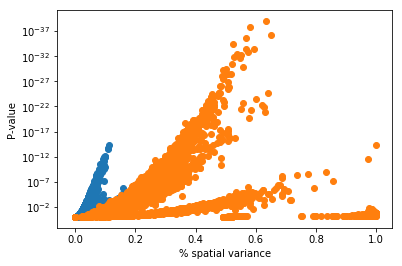

In [12]:
plt.yscale('log')
results['total_variance'] = results.max_delta * results.max_s2_t_hat + results.max_s2_t_hat

for i, g in results.groupby('model'):
    plt.scatter(g.max_s2_t_hat / g.total_variance, g.pval)
    

plt.gca().invert_yaxis();
plt.xlabel('% spatial variance')
plt.ylabel('P-value');

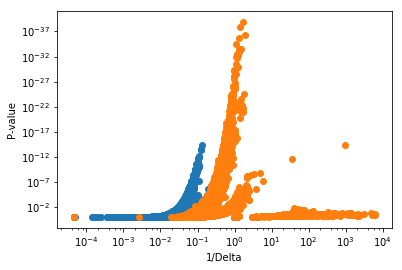

In [17]:
plt.yscale('log')
plt.xscale('log')

for i, g in results.groupby('model'):
    plt.scatter(1. / g.max_delta, g.pval)
    

plt.gca().invert_yaxis();
plt.xlabel('1/Delta')
plt.ylabel('P-value');

In [12]:
results.model.value_counts()

PER    10187
SE      4672
Name: model, dtype: int64

In [13]:
results.query('qval < 0.05').shape

(1332, 15)

In [14]:
results.query('qval < 0.05').model.value_counts()

SE     1219
PER     113
Name: model, dtype: int64

In [20]:
N = 5
top_per_ls = results.query('qval < 0.05') \
    .sort_values('qval', ascending=True) \
    .groupby('l') \
    .head(N) \
    .sort_values(['l', 'qval'], ascending=[True, True])

top_per_ls

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D,pval,qval
1182,Taf7l,0.001008,455.639696,0.003655,0.002316,262,0.000573,0.675535,4,SE,-889.006014,427.273830,28.365866,4.156775e-15,6.176552e-11
1180,4933405L10Rik,0.028260,531.283009,0.002681,0.001244,262,0.001390,0.675535,4,SE,-1040.292641,508.123638,23.159372,2.670662e-12,3.968337e-08
677,Slc22a17,0.202497,-25.612603,1.182039,0.563184,262,0.000917,0.675535,4,SE,73.498585,-43.749380,18.136777,1.329975e-09,1.976211e-05
623,Cttnbp2,0.293762,-49.442554,0.753221,0.269331,262,0.000584,0.675535,4,SE,121.158485,-66.938466,17.495913,2.930093e-09,4.353825e-05
801,Ppt2,0.357359,-42.865963,0.383494,0.116558,262,0.000529,0.675535,4,SE,108.005304,-59.961455,17.095492,4.797984e-09,7.129325e-05
1546,Nrgn,0.534301,-77.853890,0.896195,0.211849,262,0.000498,1.135190,4,SE,177.981159,-146.527481,68.673591,5.230573e-37,7.772108e-33
1513,Cdr1,0.563016,-110.188217,1.137670,0.302948,262,0.000620,1.135190,4,SE,242.649811,-157.414159,47.225943,2.479777e-25,3.684701e-21
1538,Grasp,0.790203,-47.010465,0.352671,0.077919,262,0.000524,1.135190,4,SE,116.294308,-90.592981,43.582516,2.365287e-23,3.514580e-19
1565,Tyro3,0.810354,-70.225019,0.393893,0.092593,262,0.000500,1.135190,4,SE,162.723416,-111.647209,41.422190,3.522239e-22,5.233694e-18
1515,Bin1,0.972388,-41.519168,0.973071,0.173315,262,0.000458,1.135190,4,SE,105.311713,-74.985697,33.466530,7.246308e-18,1.076729e-13


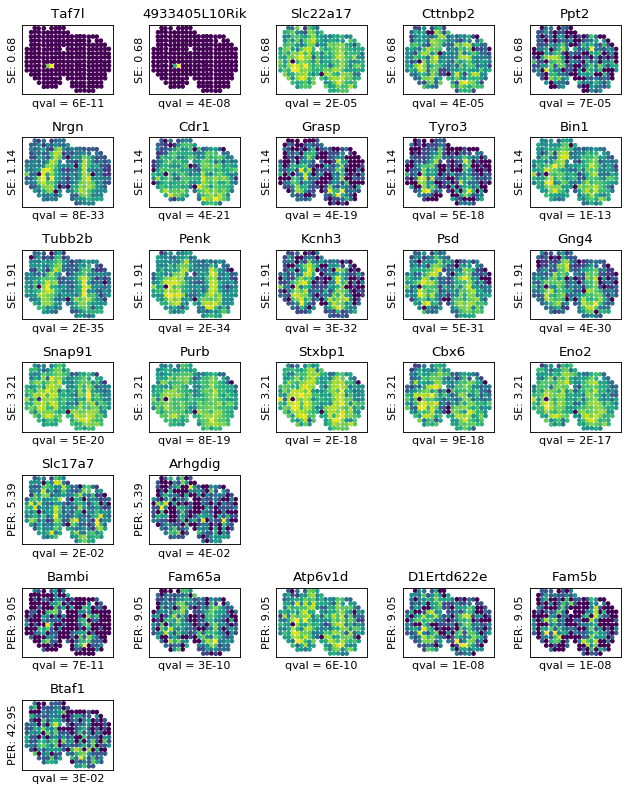

In [24]:
plt.figure(figsize=(8, 10), dpi=80)

N = 5
N_rows = top_per_ls['l'].unique().shape[0]
for j, T in enumerate(top_per_ls.groupby('l')):
    _, group = T
    for i, idx in enumerate(group.index):
        r = top_per_ls.loc[idx]
        plt.subplot(N_rows, N, j * N + i + 1)
        plt.scatter(sample_info.x, -sample_info.y, c=dfm[r['g']], s=10, rasterized=True);
        plt.title(r['g'])
        plt.xticks([])
        plt.yticks([])
        plt.xlabel('qval = {:.0E}'.format(r['qval']))
        if True:
            plt.ylabel('{}: {:.2f}'.format(r['model'], r['l']))

plt.tight_layout()
plt.savefig('top_MOB_genes_per_ls.pdf')

In [25]:
from adjustText import adjust_text

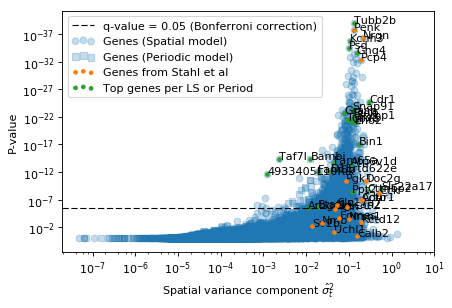

In [41]:
plt.figure(figsize=(6, 4), dpi=80)

plt.xscale('log')
plt.yscale('log')

tmp = results.query('model == "SE"')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Spatial model)', marker='o', color='C0');

tmp = results.query('model == "PER"')
plt.scatter(tmp['max_s2_t_hat'], tmp['pval'],
            alpha=0.25, rasterized=True, label='Genes (Periodic model)', marker='s', color='C0');


plt.xlim(None, 1e1)

tmp = results.query('g in ["Penk", "Doc2g", "Kctd12",' \
                        '"Actb", "Pgk1",' \
                        '"Nrsn1", "Cck",' \
                        '"Pcp4", "Nrgn",' \
                        '"Eomes", "Calb2",' \
                        '"Doc2g", "Slc17a7", "Reln", "Cdhr1", "Sv2b", "Shisa3"' \
                        '"Plcxd2", "Nmb", "Uchl1", "Rcan2"]')


plt.scatter(tmp['max_s2_t_hat'], tmp['pval'], s=10, zorder=10, label='Genes from Stahl et al', c='C1');
texts = []
for i in tmp.index.union(top_per_ls.index):
    if results.loc[i, 'max_s2_t_hat'] == 0.:
        continue

    texts.append(plt.text(results.loc[i, 'max_s2_t_hat'], results.loc[i, 'pval'], results.loc[i, 'g']))
    
# print(adjust_text(texts, arrowprops=dict(arrowstyle='-'),
#                          force_points=0.1,
#                          force_text=0.1,
#                          force_objects=0.1,
#                          zorder=20,
# #                          x=results['max_s2_t_hat'],
# #                          y=results['pval'],
#      ))

plt.scatter(top_per_ls['max_s2_t_hat'], top_per_ls['pval'], s=10, label='Top genes per LS or Period', c='C2');
    
plt.xlabel('Spatial variance component $\hat{\sigma}^2_t$');
plt.ylabel('P-value');
plt.gca().invert_yaxis()

plt.axhline(0.05 / results.shape[0], label='q-value = 0.05 (Bonferroni correction)', lw=1, linestyle='--', c='k')

plt.legend(scatterpoints=3)
plt.savefig('sigma_pval_MOB.pdf', bbox_inches='tight');

In [34]:
results.sort_values('qval', ascending=True).query('qval < 0.05').head(20)

,g,max_delta,max_ll_x,max_mu_hat,max_s2_t_hat,n,time,l,M,model,BIC,max_ll_y,D,pval,qval
2615,Tubb2b,0.576980,-33.001804,0.842366,0.129802,262,0.000549,1.907609,4,SE,88.276987,-106.610323,73.608518,1.066680e-39,1.584979e-35
2150,Penk,0.718868,-39.256438,0.978260,0.133070,262,0.000496,1.907609,4,SE,100.786253,-110.706643,71.450206,1.602816e-38,2.381625e-34
1546,Nrgn,0.534301,-77.853890,0.896195,0.211849,262,0.000498,1.135190,4,SE,177.981159,-146.527481,68.673591,5.230573e-37,7.772108e-33
2188,Kcnh3,0.759205,-70.012740,0.509116,0.107413,262,0.000551,1.907609,4,SE,162.298857,-137.576378,67.563639,2.106346e-36,3.129820e-32
2910,Psd,0.904563,-46.962828,0.766174,0.100999,262,0.000494,1.907609,4,SE,116.199034,-112.320027,65.357199,3.357054e-35,4.988247e-31
2081,Gng4,0.756995,-105.216212,0.722116,0.151624,262,0.000502,1.907609,4,SE,232.705802,-168.886794,63.670582,2.785608e-34,4.139135e-30
2259,Baiap2,0.687943,-81.622424,0.643761,0.133839,262,0.000495,1.907609,4,SE,185.518227,-145.121824,63.499400,3.452872e-34,5.130622e-30
2517,Camk2a,0.738031,-47.401332,0.710427,0.109255,262,0.000503,1.907609,4,SE,117.076041,-109.765619,62.364287,1.433993e-33,2.130770e-29
2750,Ncdn,0.854974,-105.341653,0.845626,0.151174,262,0.000496,1.907609,4,SE,232.956684,-167.038197,61.696544,3.313382e-33,4.923354e-29
1965,Pcp4,0.814371,-63.804158,1.384126,0.195644,262,0.000494,1.907609,4,SE,149.881694,-125.072703,61.268544,5.667497e-33,8.421333e-29
